In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\envs\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Heart = pd.read_csv(r"C:\Users\Sinha Rahul\Downloads\heart (1).csv")
Heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
Heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
Heart.shape

(303, 14)

In [5]:
Heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
Heart.isnull().sum().sum()

0

In [7]:
Heart.duplicated().sum()

1

In [8]:
Heart[Heart.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
Heart=Heart.drop_duplicates()
Heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
# unique value

unique_number = []
for i in Heart.columns:
    x = Heart[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = Heart.columns, columns = ['Total Unique Values'])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


# Categorical Feature Analysis

In [11]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]

In [12]:
categoric_axis_name = ['Gender', 'Chest Pain Type', 'Fasting Blood Sugar', 'Resting Electrocardiograhic Results',
                      'Exercise Induced Angina', 'The slope of ST Segment', 'Number of Major Vessels', ' Thal', 'Target']

In [13]:
list(zip(categorical_list,categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood Sugar'),
 ('restecg', 'Resting Electrocardiograhic Results'),
 ('exng', 'Exercise Induced Angina'),
 ('slp', 'The slope of ST Segment'),
 ('caa', 'Number of Major Vessels'),
 ('thall', ' Thal'),
 ('output', 'Target')]

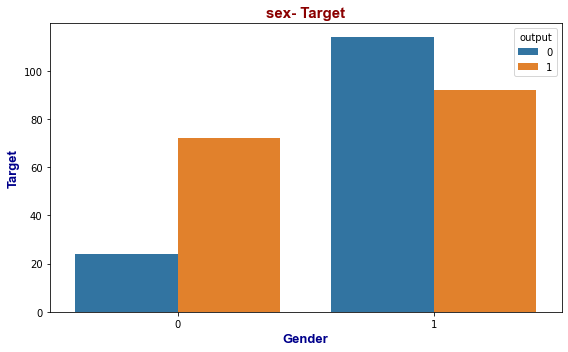

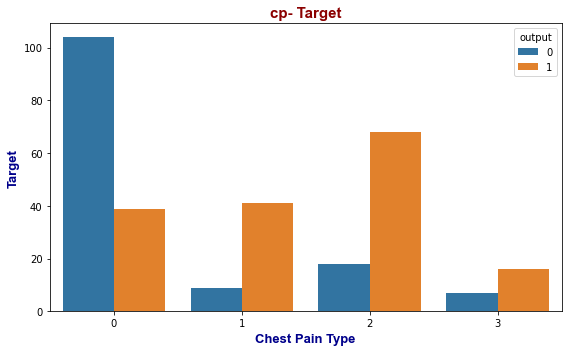

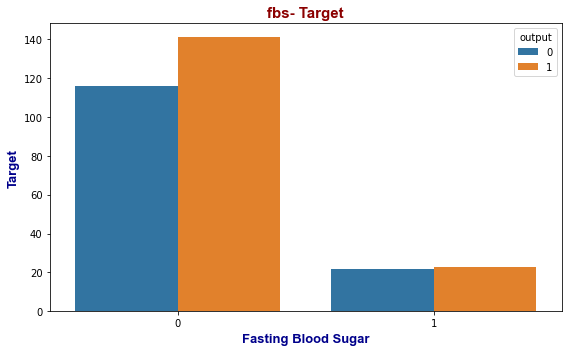

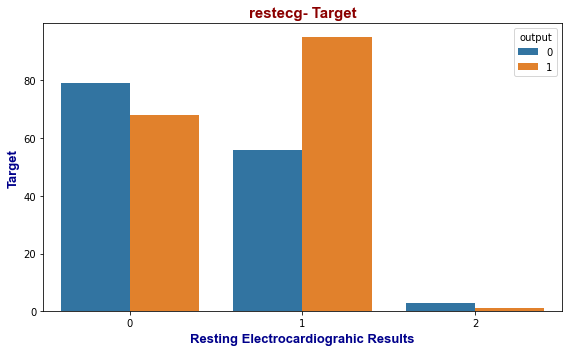

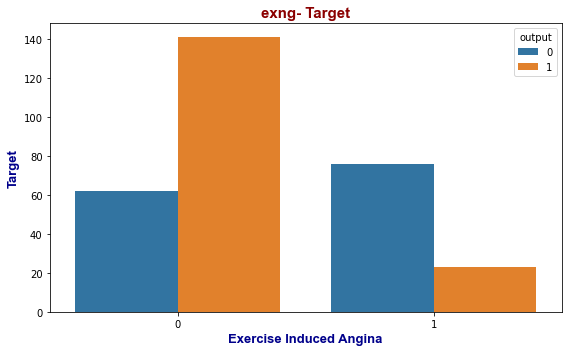

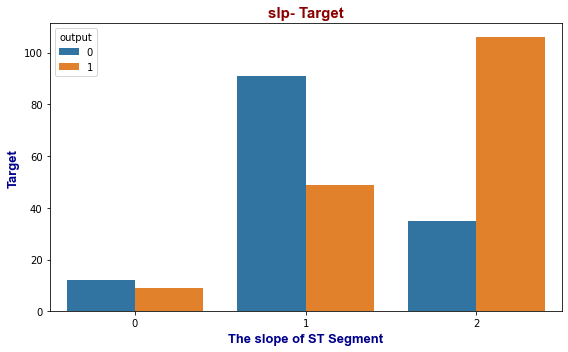

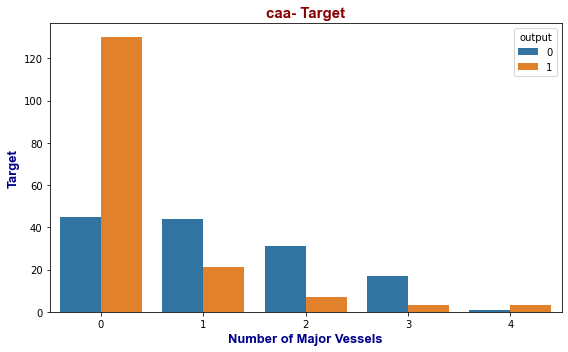

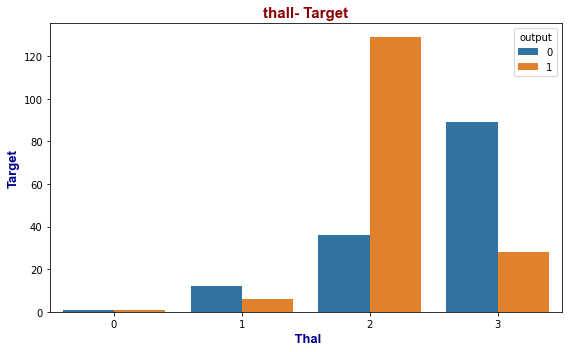

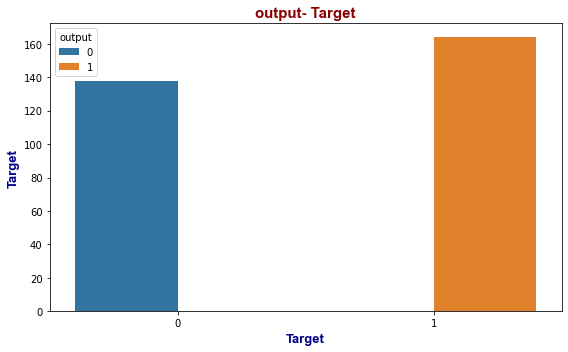

In [14]:
title_font = {'family': 'arial' , 'color': 'darkred' , 'weight' : 'bold', 'size' : 15}
axis_font =  {'family': 'arial' , 'color': 'darkblue' , 'weight' : 'bold', 'size' : 13}

for i, z in list(zip(categorical_list, categoric_axis_name)):
    plt.figure(figsize = (8,5))
    sns.countplot(x =i, data = Heart[categorical_list] ,hue = "output")
    
    plt.title(i + "- Target", fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel('Target',fontdict = axis_font)
    
    
    plt.tight_layout()
    plt.show()

# Numeric Feature Analysis

In [15]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

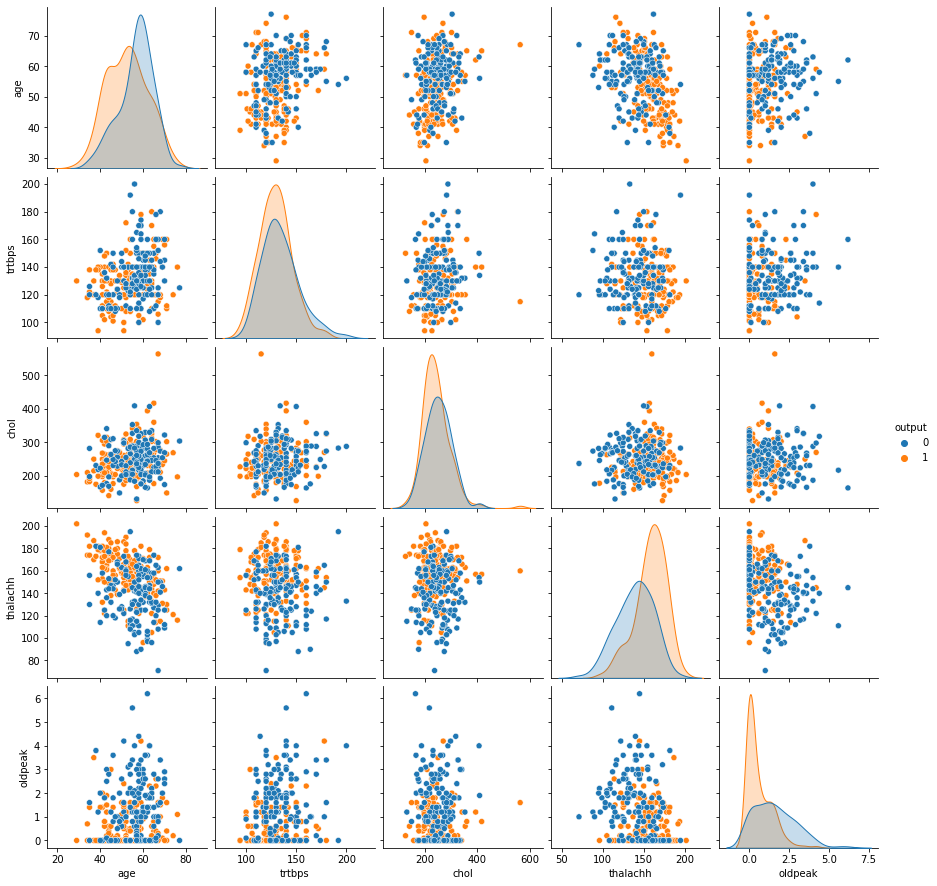

In [16]:
Heart_numeric = Heart.loc[:, numeric_list]
sns.pairplot(Heart_numeric, hue = "output", diag_kind = "kde")
plt.show()

# Numerical variables(Analysis with Distplot)

In [17]:
numeric_list

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

In [18]:
numeric_axis_name = ['Age of the Patient' , 'Resting Blood Pressure' , 'Cholestorol' , 'Maximum Heart Rate Achevied' , 'ST Depression']

In [19]:
list(zip(numeric_list, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholestorol'),
 ('thalachh', 'Maximum Heart Rate Achevied'),
 ('oldpeak', 'ST Depression')]

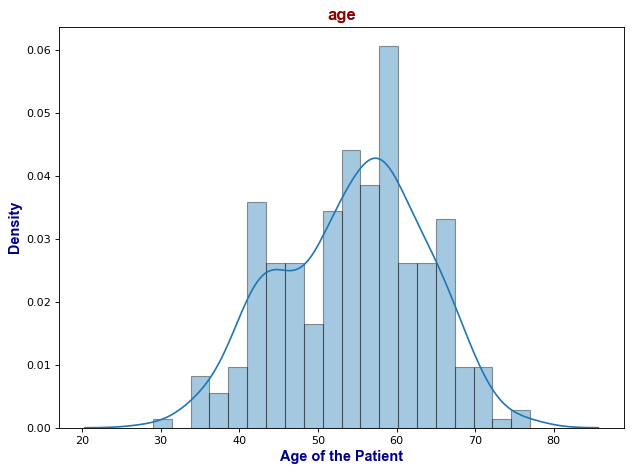

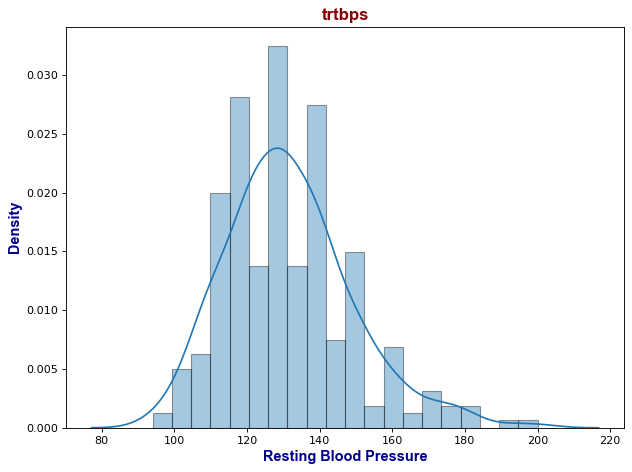

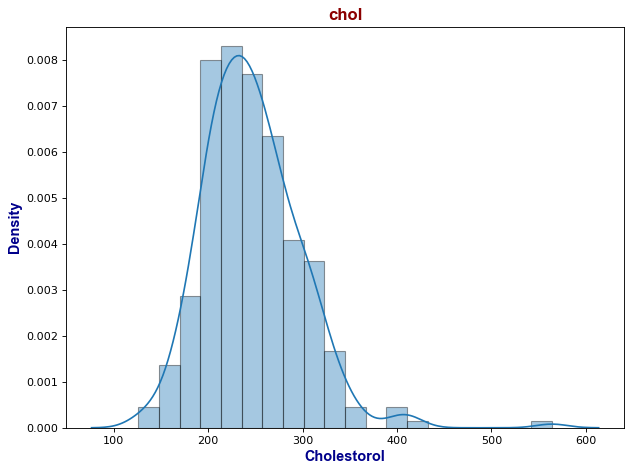

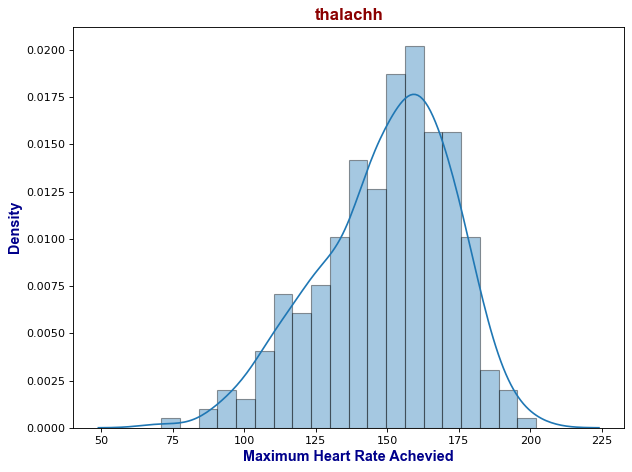

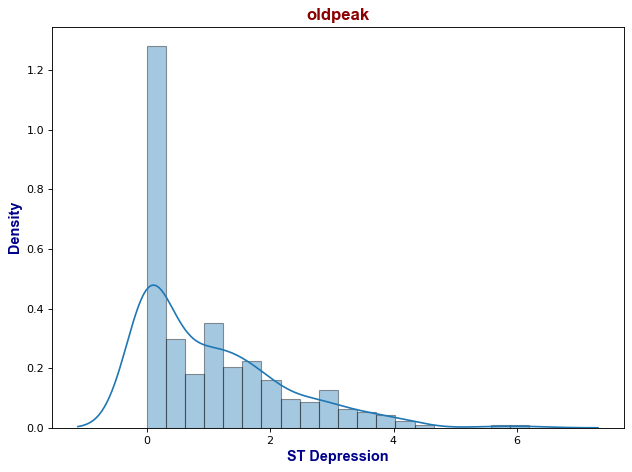

In [20]:
title_font = {'family': 'arial' , 'color': 'darkred' , 'weight' : 'bold', 'size' : 15}
axis_font =  {'family': 'arial' , 'color': 'darkblue' , 'weight' : 'bold', 'size' : 13}

for i, z in list(zip(numeric_list, numeric_axis_name)):
    plt.figure(figsize = (8,6), dpi = 80)
    sns.distplot(Heart[i], hist_kws = dict(linewidth = 1, edgecolor = 'k'), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel('Density',fontdict = axis_font)
    
    
    plt.tight_layout()
    plt.show()

# Categorical Variable(Analysis with Pie chart)

In [21]:
categorical_list

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [22]:
categoric_axis_name = ['Gender', 'Chest Pain Type', 'Fasting Blood Sugar', 'Resting Electrocardiograhic Results',
                      'Exercise Induced Angina', 'The slope of ST Segment', 'Number of Major Vessels', ' Thal', 'Target']

In [23]:
list(zip(categorical_list, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood Sugar'),
 ('restecg', 'Resting Electrocardiograhic Results'),
 ('exng', 'Exercise Induced Angina'),
 ('slp', 'The slope of ST Segment'),
 ('caa', 'Number of Major Vessels'),
 ('thall', ' Thal'),
 ('output', 'Target')]

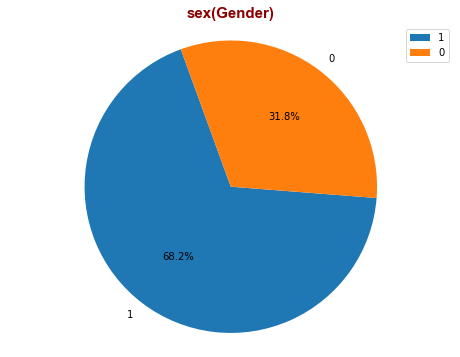

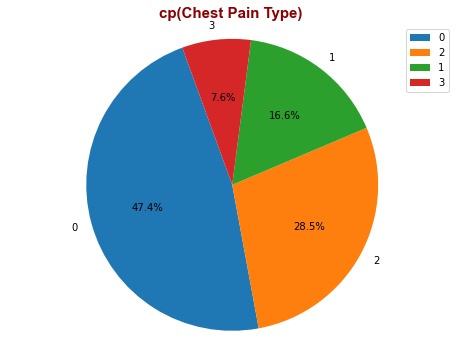

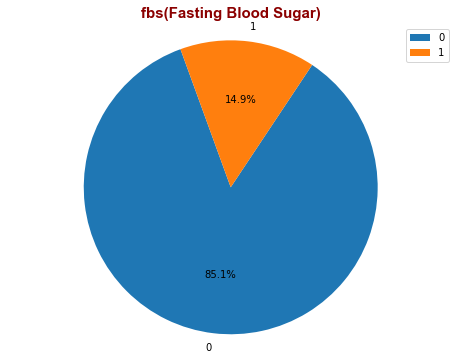

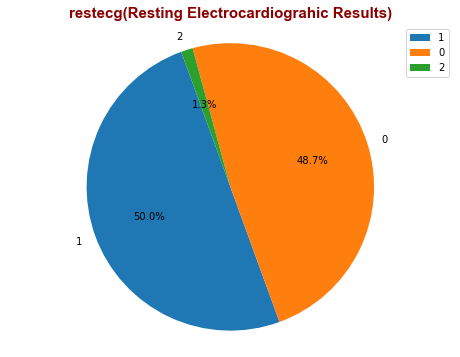

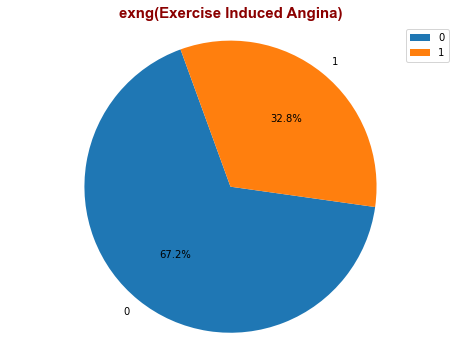

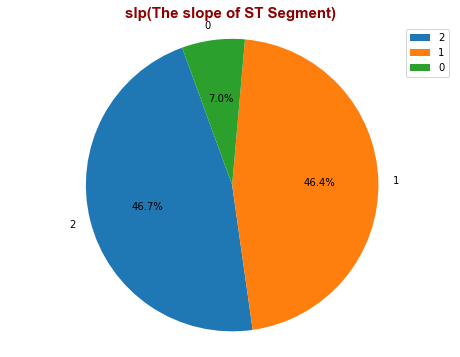

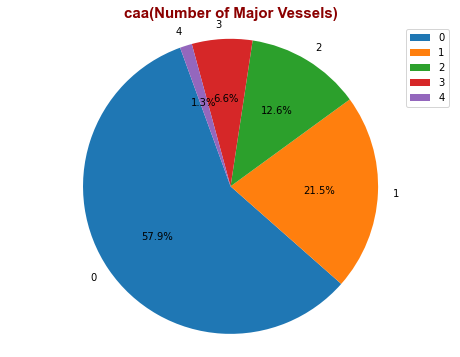

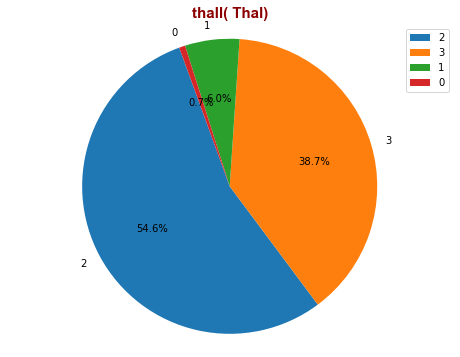

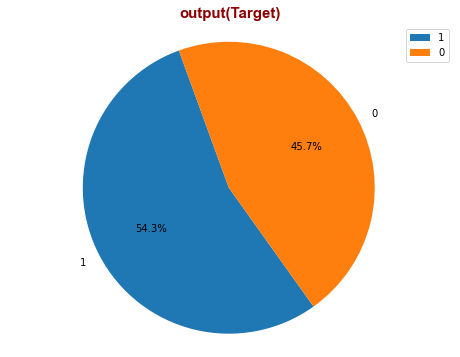

In [24]:
title_font = {'family': 'arial' , 'color': 'darkred' , 'weight' : 'bold', 'size' : 15}
axis_font =  {'family': 'arial' , 'color': 'darkblue' , 'weight' : 'bold', 'size' : 13}

for i,z in list(zip(categorical_list, categoric_axis_name)):
    fig ,ax = plt.subplots(figsize = (8,6))
    
    observation_values = list(Heart[i].value_counts().index)
    total_observation_values = list(Heart[i].value_counts())
    
    ax.pie(total_observation_values, labels = observation_values, autopct = '%1.1f%%',startangle = 110, labeldistance = 1.1)
    ax.axis('equal')
    
    plt.title((i +"(" + z +')'),fontdict = title_font)
    plt.legend()
    plt.show()

In [25]:
numeric_list

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

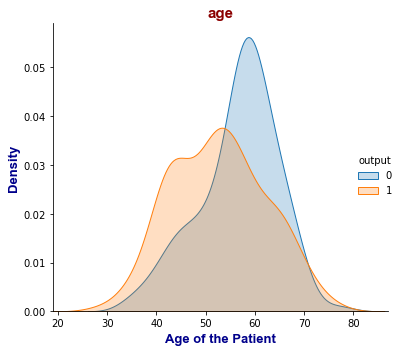

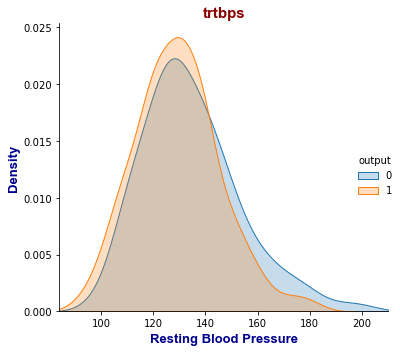

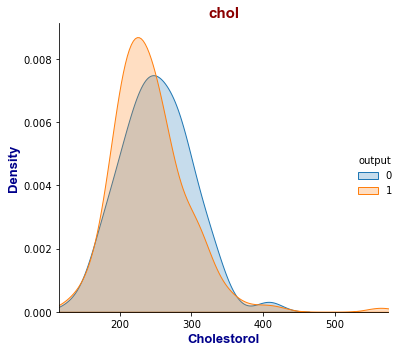

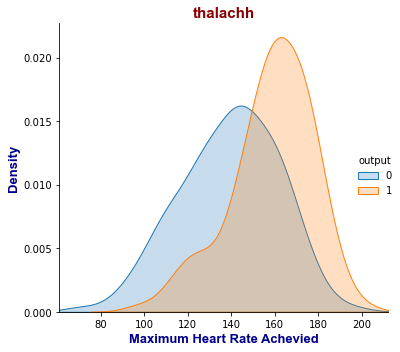

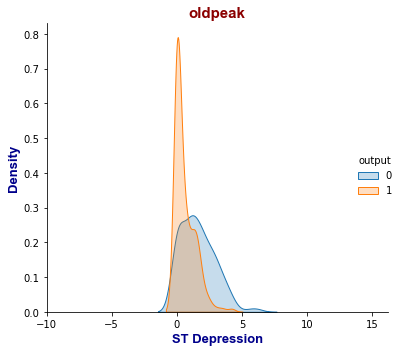

In [26]:
title_font = {'family': 'arial' , 'color': 'darkred' , 'weight' : 'bold', 'size' : 15}
axis_font =  {'family': 'arial' , 'color': 'darkblue' , 'weight' : 'bold', 'size' : 13}

for i, z in list(zip(numeric_list, numeric_axis_name)):
    graph = sns.FacetGrid(Heart[numeric_list], hue = 'output', height = 5, xlim = (Heart[i].min() - 10, Heart[i].max() + 10))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    

    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel('Density',fontdict = axis_font)
    
    
    plt.tight_layout()
    plt.show()

In [27]:
Heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [28]:
Heart["output"].value_counts()

1    164
0    138
Name: output, dtype: int64

In [29]:
x = Heart.drop(columns="output")
y = Heart["output"]

In [30]:
x.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [31]:
x.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

# Feature Scalling

In [32]:
x_scale = StandardScaler()
x_scale

StandardScaler()

In [33]:
x_scaled = x_scale.fit_transform(x)
x_scaled

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -2.27118179,
        -0.71491124, -2.1479552 ],
       [-1.92854796,  0.68265615,  1.005911  , ..., -2.27118179,
        -0.71491124, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ..., -0.64583368,
         1.27497996,  1.11996657],
       [ 0.28556146,  0.68265615, -0.93520799, ..., -0.64583368,
         0.28003436,  1.11996657],
       [ 0.28556146, -1.46486632,  0.0353515 , ..., -0.64583368,
         0.28003436, -0.51399432]])

In [34]:
Heart_scaled = pd.DataFrame(x_scaled,columns=x.columns)
Heart_scaled.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
211,-1.707137,0.682656,-0.935208,-0.775774,-0.532247,-0.418446,0.901657,-0.418513,-0.698344,0.135360,-0.645834,-0.714911,1.119967
292,1.392616,0.682656,1.005911,1.163283,-0.667728,-0.418446,-1.002541,0.018826,-0.698344,-0.209608,-0.645834,-0.714911,1.119967
202,1.503322,0.682656,1.005911,2.760154,0.532247,2.389793,-1.002541,0.018826,1.431958,0.480328,-0.645834,-0.714911,1.119967
147,0.617678,-1.464866,1.976470,1.049221,-0.125804,-0.418446,0.901657,0.937237,-0.698344,-0.123366,0.979514,-0.714911,-0.513994
59,0.285561,-1.464866,-0.935208,-0.205463,1.093526,-0.418446,-1.002541,0.412431,-0.698344,-0.899544,0.979514,0.280034,-0.513994
4,0.285561,-1.464866,-0.935208,-0.661712,2.080602,-0.418446,0.901657,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.513994
104,-0.489377,0.682656,1.005911,-0.148432,-0.977399,-0.418446,0.901657,0.587366,-0.698344,-0.899544,0.979514,-0.714911,-0.513994
11,-0.710788,-1.464866,1.005911,-0.091401,0.551602,-0.418446,0.901657,-0.462247,-0.698344,-0.727060,0.979514,-0.714911,-0.513994
109,-0.489377,-1.464866,-0.935208,-1.232023,0.145158,-0.418446,-1.002541,0.412431,-0.698344,-0.899544,0.979514,-0.714911,-0.513994
172,0.396267,0.682656,1.005911,0.022661,-0.435475,-0.418446,-1.002541,1.024705,-0.698344,1.860200,0.979514,1.274980,1.119967


In [35]:
Heart_scaled.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090


<AxesSubplot:>

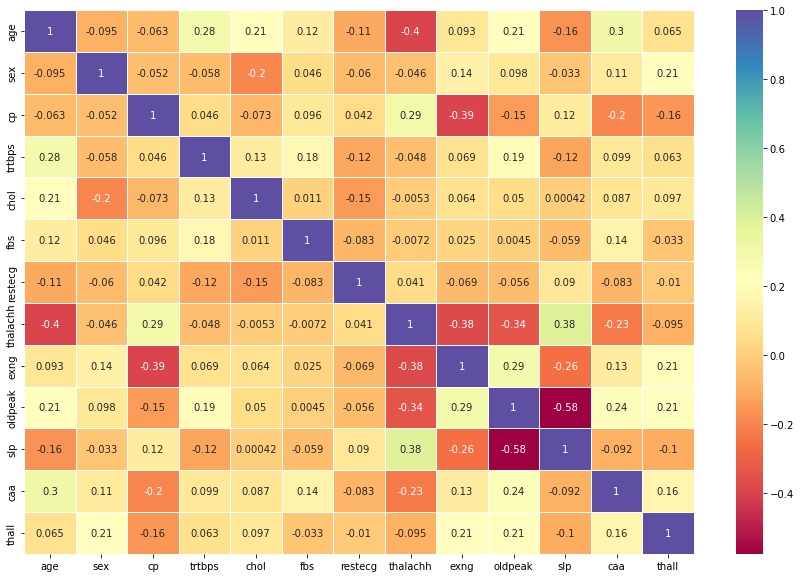

In [36]:
plt.figure(figsize = (15, 10))
sns.heatmap(Heart_scaled.corr(), cmap = 'Spectral', annot = True, linewidths = 0.5)

In [37]:
HeartDf = pd.concat([Heart_scaled,y], axis = 1)
HeartDf.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
287,0.285561,0.682656,-0.935208,-1.232023,1.712868,-0.418446,0.901657,-0.287311,1.431958,1.687716,-0.645834,0.280034,1.119967,0.0
39,1.171205,-1.464866,1.005911,1.619532,2.196729,-0.418446,-1.002541,0.062560,-0.698344,-0.209608,0.979514,-0.714911,-0.513994,1.0
69,0.839089,-1.464866,-0.935208,-0.433587,-0.725791,-0.418446,0.901657,0.587366,-0.698344,-0.899544,0.979514,-0.714911,-0.513994,1.0
265,0.064151,-1.464866,-0.935208,2.760154,1.558032,-0.418446,2.805854,-1.424392,1.431958,2.032684,-0.645834,-0.714911,-0.513994,0.0
275,0.396267,0.682656,-0.935208,0.821097,-0.551602,-0.418446,0.901657,-1.949198,-0.698344,0.825296,-0.645834,0.280034,1.119967,0.0
53,-1.153610,-1.464866,1.005911,-1.346085,-2.041893,-0.418446,0.901657,1.112172,-0.698344,-0.382092,-0.645834,-0.714911,-0.513994,1.0
98,-1.264315,0.682656,1.005911,-0.091401,1.325779,-0.418446,0.901657,0.543632,-0.698344,0.739054,0.979514,0.280034,-0.513994,1.0
250,-1.264315,0.682656,-0.935208,0.022661,0.009677,2.389793,-1.002541,-0.287311,1.431958,-0.813302,-0.645834,3.264871,1.119967,0.0
15,-0.489377,-1.464866,1.005911,-0.661712,-0.532247,-0.418446,0.901657,0.368697,-0.698344,0.480328,-0.645834,-0.714911,-0.513994,1.0
46,-1.153610,0.682656,1.005911,0.478910,-0.222576,-0.418446,-1.002541,1.330842,-0.698344,-0.899544,0.979514,-0.714911,-0.513994,1.0


In [38]:
#HeartDf.isnull().sum().sum()

In [39]:
#HeartDf = HeartDf.dropna()
#HeartDf.sample(10)

In [40]:
HeartDf.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,302.000000
mean,-2.724090e-16,-2.492487e-16,-1.666943e-16,-8.053712e-16,-2.086263e-17,-3.529186e-17,8.455341e-17,-4.087974e-16,-5.440828e-17,-1.948405e-16,5.168787e-16,-1.224186e-15,7.183364e-16,0.543046
std,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,0.498970
min,-2.814192e+00,-1.464866e+00,-9.352080e-01,-2.144521e+00,-2.332210e+00,-4.184463e-01,-1.002541e+00,-3.436149e+00,-6.983443e-01,-8.995441e-01,-2.271182e+00,-7.149112e-01,-3.781916e+00,0.000000
25%,-7.107878e-01,-1.464866e+00,-9.352080e-01,-6.617119e-01,-6.870826e-01,-4.184463e-01,-1.002541e+00,-7.137164e-01,-6.983443e-01,-8.995441e-01,-6.458337e-01,-7.149112e-01,-5.139943e-01,0.000000
50%,1.195033e-01,6.826561e-01,3.535150e-02,-9.140084e-02,-1.161266e-01,-4.184463e-01,9.016566e-01,1.281605e-01,-6.983443e-01,-2.096081e-01,-6.458337e-01,-7.149112e-01,-5.139943e-01,1.000000
75%,7.283833e-01,6.826561e-01,1.005911e+00,4.789102e-01,5.467629e-01,-4.184463e-01,9.016566e-01,7.185677e-01,1.431958e+00,4.803280e-01,9.795144e-01,2.800344e-01,1.119967e+00,1.000000
max,2.499671e+00,6.826561e-01,1.976470e+00,3.900776e+00,6.145034e+00,2.389793e+00,2.805854e+00,2.292987e+00,1.431958e+00,4.447460e+00,9.795144e-01,3.264871e+00,1.119967e+00,1.000000


# Spilting data into train and test data

In [41]:
x1 = HeartDf.drop(columns="output",axis=1)
y1 = HeartDf["output"]

In [42]:
x1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.949794,0.682656,1.976470,0.764066,-0.261285,2.389793,-1.002541,0.018826,-0.698344,1.084022,-2.271182,-0.714911,-2.147955
1,-1.928548,0.682656,1.005911,-0.091401,0.067741,-0.418446,0.901657,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.513994
2,-1.485726,-1.464866,0.035352,-0.091401,-0.822564,-0.418446,-1.002541,0.980971,-0.698344,0.307844,0.979514,-0.714911,-0.513994
3,0.174856,0.682656,0.035352,-0.661712,-0.203222,-0.418446,0.901657,1.243374,-0.698344,-0.209608,0.979514,-0.714911,-0.513994
4,0.285561,-1.464866,-0.935208,-0.661712,2.080602,-0.418446,0.901657,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.513994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.042904,0.682656,1.976470,-1.232023,0.338703,-0.418446,0.901657,-0.768384,-0.698344,0.135360,-0.645834,-0.714911,1.119967
299,1.503322,0.682656,-0.935208,0.707035,-1.035462,2.389793,0.901657,-0.374779,-0.698344,2.032684,-0.645834,1.274980,1.119967
300,0.285561,0.682656,-0.935208,-0.091401,-2.235438,-0.418446,0.901657,-1.511859,1.431958,0.135360,-0.645834,0.280034,1.119967
301,0.285561,-1.464866,0.035352,-0.091401,-0.203222,-0.418446,-1.002541,1.068439,-0.698344,-0.899544,-0.645834,0.280034,-0.513994


In [43]:
y1

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
298    0.0
299    0.0
300    0.0
301    0.0
302    0.0
Name: output, Length: 303, dtype: float64

In [44]:
x1train,y1train,x1test,y1test = train_test_split(x1,y1,test_size = 0.30, random_state = 99)

In [45]:
print(x1train.shape)
print(x1test.shape)
print(y1train.shape)
print(y1test.shape)

(212, 13)
(212,)
(91, 13)
(91,)


# training different model with training data

In [46]:
models = [LogisticRegression(max_iter=1000),RandomForestClassifier,KNeighborsClassifier,DecisionTreeClassifier,SVC(kernel="linear")]

In [47]:
def compare_model_train_data():
    for model in models:
        model.fit(x1train,y1train)
        xtrain_predication = model.predict(x1train)
        training_data_accuracy = accuracy_score(xtrain_predication,y1train)
        print("accuracy of train ",model,"=",training_data_accuracy)

In [48]:
models

[LogisticRegression(max_iter=1000),
 sklearn.ensemble._forest.RandomForestClassifier,
 sklearn.neighbors._classification.KNeighborsClassifier,
 sklearn.tree._classes.DecisionTreeClassifier,
 SVC(kernel='linear')]

In [49]:
compare_model_train_data() 

ValueError: y should be a 1d array, got an array of shape (91, 13) instead.